<a href="https://colab.research.google.com/github/jialun1221/scRNA-seq/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Install packages

In [ ]:
!pip3 install torch torchvision matplotlib
!pip3 install --upgrade pillow==8.1.0
!pip3 install matplotlib
#if branch is stable, will install via pypi, else will install from source
import sys
branch = "stable"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@$branch#egg=scvi-tools[tutorials]

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
from sklearn import preprocessing 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import importlib
required_libraries = ['torch', 'torchvision', 'PIL', 'matplotlib', 
                      'numpy', 'pandas']
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        print("%s unavailable" % lib)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read in the AnnData object
adata = scvi.data.read_h5ad("drive/MyDrive/pca_in_obsm.h5ad")

In [ ]:
adata.obs = adata.obs.reset_index() #reset the index for X, so the column number starts from 0

In [ ]:
X = pd.DataFrame(adata.obsm['X_pca'])
y = adata.obs['disease__ontology_label'].replace({"normal": "0", "Parkinson disease": "1"})



```
no_index = scRNAdf.drop('index', axis=1)
newdf = no_index.drop(index=no_index[no_index['disease__ontology_label'].str.contains('Lewy body dementia')].index)
newdf["disease__ontology_label"] = newdf["disease__ontology_label"].replace({"normal": "0", "Parkinson disease": "1"})
X = newdf[list(newdf.columns[0:3799])]
y = newdf['disease__ontology_label']
```



###**Logistic Regression Model from Scikit Learn**

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import scanpy as sc

from torch.utils.data import TensorDataset

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

print("Torch version: ", torch.__version__)
print("GPU Available: {}".format(use_gpu))

Torch version:  1.12.1+cu113
GPU Available: False


In [ ]:
seed = 4321
np.random.seed(seed) # Set the random seed of numpy for the data split.
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

####Run Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#### Train Test Split

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

####Run the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import sklearn.metrics as metrics

In [ ]:
#create a model instance
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
prediction_test = model.predict(X_test)

In [ ]:
#Step 9. Verify the accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.9639759839893263


In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs= -1)

NameError: ignored

In [ ]:
#generate confusion matrix
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)

In [ ]:
!pip install matplotlib==3.1.3

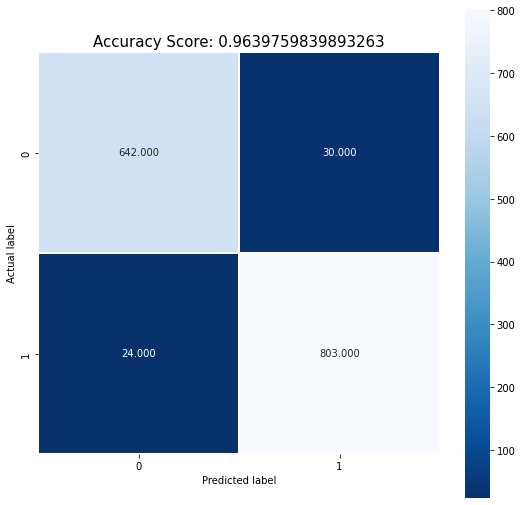

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
#X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


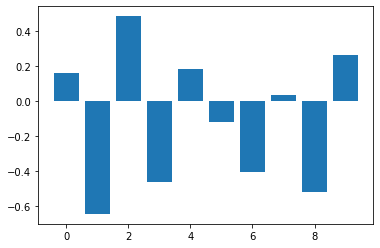

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()